<h1>Logistic Regression</h1>
<p>by: Afonso Proenca</p>

<p>Import Libraries</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<p>Define Functions</p>

In [2]:
def sigmoid(sig):
    sigmoid = 1/(1+np.exp(-sig));
    return sigmoid

In [3]:
def cost(X,y,t,m):
    cost = (1/m) * np.sum((-y*np.log(hypothesis(X.T,t,X[0].size+1))) - ((1-y)*np.log(1-hypothesis(X.T,t,X[0].size+1))))
    return cost

In [4]:
def hypothesis(X,t,n):
    hypothesis = 0
    for i in range(n):
        hypothesis += t[i]*pow(X,i)
    hypothesis = sigmoid(hypothesis)
    return hypothesis

In [5]:
def threshold(inThresh,thresh):
    return inThresh >= thresh

In [6]:
def fit(X,y,lr):
    t = np.random.rand(X[0].size+1)
    m = len(y)
    for i in range(10000):
        v = np.zeros(X[0].size+1)
        for j in range(X[0].size+1):
            v[j] = t[j]-((lr/m)*np.sum((hypothesis(X.T,t,X[0].size+1)-y)*pow(X.T,j)))
            t[j] = v[j]
        loss = cost(X,y,t,m)
        if loss < 0.5:
            return t
            break
        if(i == 1000):
            return t
            break

In [7]:
def predict(X,t):
    y_pred = hypothesis(X,t,X[0].size+1).T;
    y_pred = threshold(y_pred,0.5)
    y_pred = 1*y_pred
    return y_pred[0]

In [8]:
def myConfMat(y_test,y_pred):
    ConfMat= np.zeros([max(y_test)+1,max(y_test)+1])
    for i in range(len(y_test)):
        ConfMat[y_test[i]][y_pred[i]] += 1;
    return ConfMat    

In [9]:
def myPrecision(y_test,y_pred):
    classes = np.unique(y_pred)
    matrix = myConfMat(y_test,y_pred)
    precision = np.zeros([len(classes)])
    for i in range(len(classes)):
        precision[i] = matrix[i][i] / (sum(matrix.T[i]))
    return precision

In [10]:
def myRecall(y_test,y_pred):
    classes = np.unique(y_pred)
    matrix = myConfMat(y_test,y_pred)
    recall = np.zeros([len(classes)])
    for i in range(len(classes)):
        recall[i] = matrix[i][i] / (sum(matrix[i]))
    return recall

<p>Define Variables</p>

In [11]:
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75],
[3.00], [4.75], [1.75], [3.25], [5.00], [2.00], [2.25], [2.50],
[2.75], [3.50], [4.00], [4.25], [4.50], [5.50]])
y = np.asarray([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
n = X[0].size+1
lr = 0.1
nFolds = 5;

<p>Choose the best dataset bin</p>

In [12]:
y_pred = np.zeros([len(y)])
accuracy_fold=[]
bestAccuracy = -1
bestModel = np.zeros(X[0].size+1)
indices=np.random.permutation(y.size)
bins= np.array_split(indices,nFolds)
for i in range(0,nFolds):
    foldTest=[]
    foldTrain=[]
    foldTest.extend(bins[i])
    if (i+1)%nFolds == 0:
        foldTrain.extend(bins[((i+1)%nFolds):i])
    else:
        foldTrain.extend(bins[:i] + bins[((i+1)%nFolds):])
    foldTrain = [y for x in foldTrain for y in x]        
    print('Fold',i+1,'Train', len(foldTrain),'Test',len(foldTest))
    model = fit(X[foldTrain],y[foldTrain],lr)
    y_pred = predict(X[foldTest],model)
    accuracy = np.where(y[foldTest]==y_pred)[0].size/y[foldTest].size
    accuracy_fold.append(accuracy)
    if accuracy > bestAccuracy:
        bestModel = model

Fold 1 Train 16 Test 4
Fold 2 Train 16 Test 4
Fold 3 Train 16 Test 4
Fold 4 Train 16 Test 4
Fold 5 Train 16 Test 4


<p>Make Prediction</p>

In [13]:
y_pred = predict(X,bestModel)
accuracy = np.where(y==y_pred)[0].size/y.size
confMat = myConfMat(y,y_pred)

<p>Plot Prediction</p>

Accuracy/Fold: [0.5, 0.75, 1.0, 0.5, 1.0]
Best Model (Theta): [-2.15255743  0.79525873]
Predicted: [0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1]
Solution:  [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


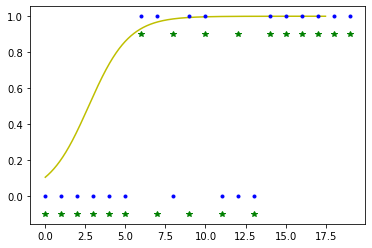

Accuracy:  0.8
Class: 0 Precision: 0.8 Recall: 0.8
Class: 1 Precision: 0.8 Recall: 0.8
Confusion Matrix:
[[8. 2.]
 [2. 8.]]


In [14]:
x_ = []
y_ = []
for i in range(1750):
    _x = (i/100)
    x_.append(_x)
    _y = hypothesis(_x,bestModel,n)
    y_.append(_y)
plt.plot(x_,y_,"y")

print("Accuracy/Fold:",accuracy_fold)
print("Best Model (Theta):",bestModel)
print("Predicted:",y_pred)
print("Solution: ",y)
plt.plot(y-0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()
print("Accuracy: ",accuracy)
for i in np.unique(y):
    print('Class:',i,"Precision:",myPrecision(y,y_pred)[i],"Recall:",myRecall(y,y_pred)[i])   
print("Confusion Matrix:")
print(myConfMat(y,y_pred))